In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
with open('seasons.pickle') as f:
    seasons = pickle.load(f)
for year, season in seasons.iteritems():
    print year,
    season.load_scores()

2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017


In [3]:
men_by_year = []
ladies_by_year = []
pairs_by_year = []
dance_by_year = []
skaters = [men_by_year, ladies_by_year, pairs_by_year, dance_by_year]
for year in seasons:
    season = seasons[year]
    for event in season.events:
        for i, discipline in enumerate(event.disciplines):
            df = pd.read_csv(discipline.results_csv)
            skaters[i].append(df)

In [4]:
men = pd.concat(men_by_year)
ladies = pd.concat(ladies_by_year)
pairs = pd.concat(pairs_by_year)
dance = pd.concat(dance_by_year)
for discipline in (men, ladies, pairs, dance):
    discipline.Date = pd.to_datetime(discipline.Date)

In [5]:
men.head()

,Date,Event,Free Rank,Free Score,Name,Nation,Points,Rank,Short Rank,Short Score
0,2005-10-23,gpusa05,1,149.44,Daisuke TAKAHASHI,JPN,218.54,1,1,69.1
1,2005-10-23,gpusa05,3,125.96,Evan LYSACEK,USA,193.71,2,3,67.75
2,2005-10-23,gpusa05,2,127.4,Brian JOUBERT,FRA,190.28,3,4,62.88
3,2005-10-23,gpusa05,4,116.3,Kevin VAN DER PERREN,BEL,185.09,4,2,68.79
4,2005-10-23,gpusa05,6,98.58,Yannick PONSERO,FRA,160.53,5,5,61.95


In [6]:
# Fix duplicate names.
def ascii_encode_dict(data):
    ascii_encode = lambda x: x.encode('ascii')
    return dict(map(ascii_encode, pair) for pair in data.items())

with open('pd_data/men_name_fixes.json') as f:
    men_name_fixes = f.read()
men_name_fixes = json.loads(men_name_fixes, object_hook=ascii_encode_dict)

for wrong_name, right_name in men_name_fixes.iteritems():
    men.loc[men.Name == wrong_name, 'Name'] = right_name

In [7]:
# men[['Name', 'Nation']].sort_values(by='Name')

In [8]:
# Histogram of point totals (ignoring withdrawals and gpfra2015).
def remove_wds_and_plot_points(data):
    data = data[data['Free Rank'].str.isalpha() != True]
    data[data['Event'] != 'gpfra2015'].Points.astype(float).hist()

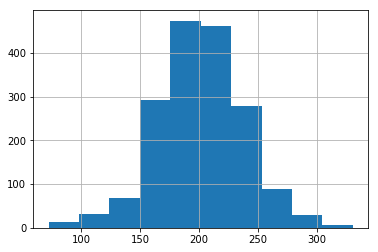

In [9]:
remove_wds_and_plot_points(men)
plt.show()

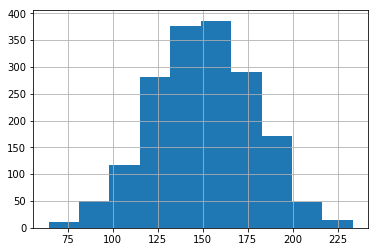

In [10]:
remove_wds_and_plot_points(ladies)
plt.show()

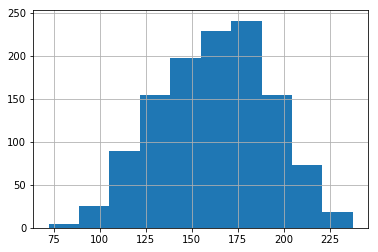

In [11]:
remove_wds_and_plot_points(pairs)
plt.show()

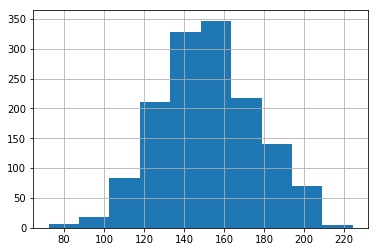

In [12]:
remove_wds_and_plot_points(dance)
plt.show()

In [33]:
print len(men), len(ladies), len(pairs), len(dance)

2085 2181 1287 1620
